# Earth Mover's distances for tevsimbad

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE


In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['s_MAIN_ID', 's_class',  'tev_fermi_names', 'tev_classes', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/tevsimbad_TeVspectrum_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,s_FLUX_I,s_FLUX_G,s_FLUX_J,s_FLUX_H,s_FLUX_K,s_FLUX_u,...,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
0,0.0,0.000000,0.000000,0.000060,0.000000,0.000143,0.001702,0.003243,0.007779,0.0,...,0.484812,0.272675,0.056902,0.037315,0.135368,b'UCAC4 105-013663',Be,b'',b'other',0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000338,0.019565,0.869940,0.0,...,0.045760,0.029010,0.025940,0.008455,0.000992,b'MSX6C G331.5487-00.5364',Be,b'',b'unid',0
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000009,0.002454,0.616424,0.0,...,0.148664,0.120621,0.081368,0.027734,0.002726,b'SSTGC 519103',Be,b'',b'unid',0
3,0.0,0.027707,0.045983,0.000000,0.000000,0.000000,0.132615,0.170842,0.205397,0.0,...,0.003439,0.230194,0.136930,0.045784,0.001110,b'RMC 141',B,b'',b'pwn',0
4,0.0,0.000531,0.000618,0.000343,0.000474,0.000618,0.000385,0.000260,0.000244,0.0,...,0.489456,0.275287,0.057447,0.037672,0.136665,b'[AAA97b] J053648.7-691700',B,b'',b'other',0


In [5]:
spectrum_columns = spectra.columns[:-7]

Computation of pairwise distances (metric - Earth mover's distance (Wasserstein distance))

In [6]:
dist = DistanceMetric.get_metric("pyfunc", func=st.wasserstein_distance)
spectra_distances = dist.pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

Vizualization (mapping to 2D-plane)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


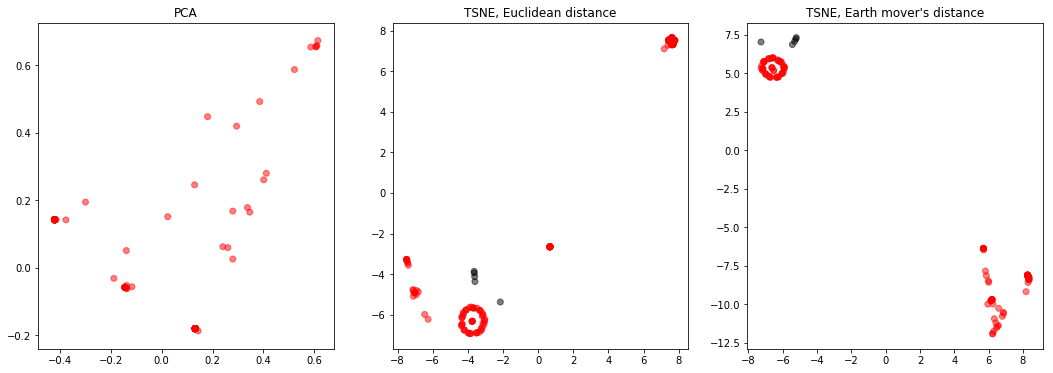

In [7]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Earth mover's distance")
tsne = TSNE(n_components=2, metric=st.wasserstein_distance, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

KMeans clustering (with Earth mover's distance metric)

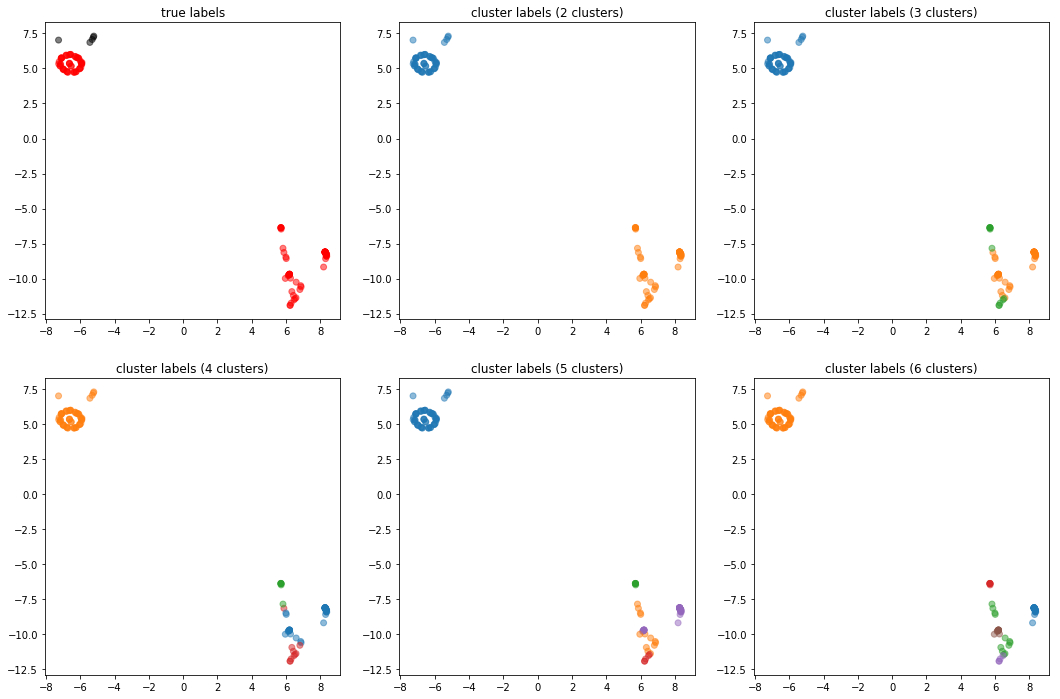

In [8]:
# visualization - tsne with Earth mover's distance
tsne = TSNE(n_components=2, metric=st.wasserstein_distance, random_state=42)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

plt.subplots(figsize=(18, 12))
plt.subplot(2, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 7):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(2, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [9]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])

0 cluster


,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
5,b'OGLE LMC-ECL-20994',B,b'',b'pwn',0
15,b'SSTISAGE1C J053736.75-690633.4',B,b'',b'pwn',0
17,b'Cl* NGC 2070 SMB 455',O,b'',b'pwn',0
18,b'Cl* NGC 2070 SMB 206',O,b'',b'pwn',0
19,b'Cl* NGC 2070 SMB 163',O,b'',b'pwn',0
20,b'OGLE LMC-ECL-21453',O,b'',b'pwn',0
21,b'OGLE LMC-ECL-21400',O,b'',b'pwn',0
26,b'VFTS 318',O,b'',b'pwn',0
27,b'VFTS 183',B0Ve,b'',b'pwn',0
28,b'OGLE LMC-ECL-21065',B0Ve,b'',b'pwn',0


1 cluster


,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
59,b'LS I +61 303',B0Ve,b'',b'bin',1
60,b'HD 259440',B0Ve,b'',b'bin',1
61,b'[CHP2004] J095549.8+693934',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
62,b'[MTK2001b] 8',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
63,b'[CHP2004] J095637.5+694137',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
64,b'CXOU J095601.7+694308',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
65,b'CXOU J095548.9+694010',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
66,b'CXOU J095527.1+693923',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
67,b'CXOU J095552.8+694020',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
68,b'CXOU J095552.4+694024',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


2 cluster


,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
2,b'SSTGC 519103',Be,b'',b'unid',0
7,b'[KKM2013] 7',B,b'',"b'pwn,snr'",0
9,b'HTR 13',B,b'',b'pwn',0
10,b'LS IV -05 11',B,b'',b'unid',0
23,b'GCIRS 8',O,b'',b'unid',0
30,b'HD 43582',B0Ve,b'',b'snr',0
36,b'[MT91] 213',B0Ve,b'',b'unid',0
37,b'2MASS J05384705-6905016',B0Ve,b'',b'pwn',0
48,b'Schulte 21',B0Ve,b'',b'unid',0
93,b'SN 2004am',B0Ve,"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


3 cluster


,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
1,b'MSX6C G331.5487-00.5364',Be,b'',b'unid',0
12,b'GCIRS 1W',B,b'',b'unid',0
22,b'[MCD2010] 18',O,b'',b'unid',0
24,b'[MCD2010] 13',O,b'',b'unid',0
25,b'[MCD2010] 13',O,b'',b'unid',0
110,b'[KRL2007b] 332',B0Ve,b'',b'unid',0


4 cluster


,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
3,b'RMC 141',B,b'',b'pwn',0
16,b'CPD-69 416',B,b'',b'other',0
49,b'RMC 142',B0Ve,b'',b'pwn',0
117,b'Brey 84',B0Ve,b'',b'pwn',0


5 cluster


,s_MAIN_ID,s_class,tev_fermi_names,tev_classes,marked
0,b'UCAC4 105-013663',Be,b'',b'other',0
4,b'[AAA97b] J053648.7-691700',B,b'',b'other',0
6,b'[ST92] 2-62B',B,b'',b'other',0
8,b'[ST92] 2-62',B,b'',b'other',0
11,b'[M2002] LMC 164553',B,b'',b'other',0
13,b'[M2002] LMC 161594',B,b'',b'other',0
14,b'Cl* NGC 2070 SMB 283',B,b'',b'pwn',0
32,b'[LSB2000] Star 2',B0Ve,b'',b'other',0
34,b'UCAC2 1802729',B0Ve,b'',b'other',0
35,b'[ST92] 2-27',B0Ve,b'',b'other',0
